# Convolutional Neural Network
## The CIFAR-10 dataset

### Juan Fernando González
20170085

## Libraries

In [38]:
import keras
from keras.utils import plot_model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard 
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import joblib
import os

import numpy as np
from time import time
import matplotlib.pyplot as plt
import pydot 

%matplotlib inline

## Load Data

In [2]:
# The data, split between train and test sets:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Initial Exploration

Let's see the shapes of the train and test data.

In [3]:
print('X Train data shape: ', X_train.shape)
print('X Test data shape: ', X_test.shape)
print('Y Train data shape: ', y_train.shape)
print('Y Test data shape: ', y_test.shape)

X Train data shape:  (50000, 32, 32, 3)
X Test data shape:  (10000, 32, 32, 3)
Y Train data shape:  (50000, 1)
Y Test data shape:  (10000, 1)


In total there are 60000 features.

Ther are 10 different classes to be classified in this dataset:
    
    1. Airplane ✈️
    2. Automobile 🚗
    3. Bird 🦜
    4. Cat 🐱
    5. Deer 🦌
    6. Dog 🐶
    7. Frog 🐸
    8. Horse 🐴
    9. Ship 🛥
    10. Truck 🚚

In [4]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

#### Example of an image display

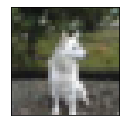

Class: Dog


In [5]:
i = 750
fig,ax=plt.subplots(figsize=(2,2))
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
ax.imshow(X_train[i])
plt.show()
print("Class: {}".format(classes[int(y_train[i])]))

### Normalize data

Let's scale the features (pixels) to 0 - 1 and convert the type to float for computational performance.

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### One Hot Encoding 

In [7]:
# Convert class vectors to binary class matrices.

y_train = keras.utils.to_categorical(y_train, len(classes))
y_test = keras.utils.to_categorical(y_test, len(classes))

## CNN Architecture

In [8]:
# Define the CNN 

CNN = Sequential(name='Cool CNN No. 3')

### Convlolutional layers

In [9]:
#convlolutional layers

CNN.add(Conv2D(32, kernel_size=(3,3), input_shape=(X_train.shape[1:]), activation='relu'))
CNN.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Dropout(0.25))

CNN.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
CNN.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Dropout(0.25))

### Dense layers

In [10]:
CNN.add(Flatten())

CNN.add(Dense(256, activation='relu'))
CNN.add(Dropout(0.3))

CNN.add(Dense(len(classes), activation='softmax'))

### Compile the Model

In [11]:
# Compile the model

#opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0)

CNN.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(CNN.summary())
print('\n\t -------------------- Compiled! --------------------')

Model: "Cool CNN No. 3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)       

## Trainning the Model

In [12]:
model_history = CNN.fit(X_train, y_train,
                          batch_size = 32,
                          epochs = 100,
                          validation_data=(X_test, y_test),
                          shuffle=True, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 181s 4ms/step - loss: 2.1099 - accuracy: 0.2129 - val_loss: 1.7884 - val_accuracy: 0.3575
Epoch 2/100
50000/50000 [==============================] - 181s 4ms/step - loss: 1.7529 - accuracy: 0.3579 - val_loss: 1.5942 - val_accuracy: 0.4177
Epoch 3/100
50000/50000 [==============================] - 181s 4ms/step - loss: 1.5835 - accuracy: 0.4208 - val_loss: 1.4295 - val_accuracy: 0.4817
Epoch 4/100
50000/50000 [==============================] - 192s 4ms/step - loss: 1.4414 - accuracy: 0.4753 - val_loss: 1.3430 - val_accuracy: 0.5121
Epoch 5/100
50000/50000 [==============================] - 199s 4ms/step - loss: 1.3630 - accuracy: 0.5097 - val_loss: 1.2556 - val_accuracy: 0.5542
Epoch 6/100
50000/50000 [==============================] - 199s 4ms/step - loss: 1.2933 - accuracy: 0.5380 - val_loss: 1.2559 - val_accuracy: 0.5501
Epoch 7/100
50000/50000 [==============================]

## Analize training history and results

In [13]:
def plot_hist(model_history):
    fix,axs=plt.subplots(2,1,figsize=(20,8))
    ax1 = axs[0]
    ax1.plot(model_history.history['accuracy'])
    ax1.plot(model_history.history['val_accuracy'],c='g')
    ax1.set_title('Model accuracy',fontsize=16)
    ax1.set_ylabel('Accuracy',fontsize=8)
    ax1.set_xlabel('Epoch',fontsize=8)
    ax1.grid(alpha=0.3)
    ax1.legend(['Train', 'Test'], loc='upper left')


    # # summarize history for loss
    ax2 = axs[1]
    ax2.plot(model_history.history['loss'],c='r')
    ax2.plot(model_history.history['val_loss'],c='orange')
    ax2.set_title('Model loss',fontsize=16)
    ax2.set_ylabel('Accuracy',fontsize=8)
    ax2.set_xlabel('Epoch',fontsize=8)
    ax2.grid(alpha=0.3)
    ax2.legend(['train', 'test'], loc='upper right')
    plt.show()

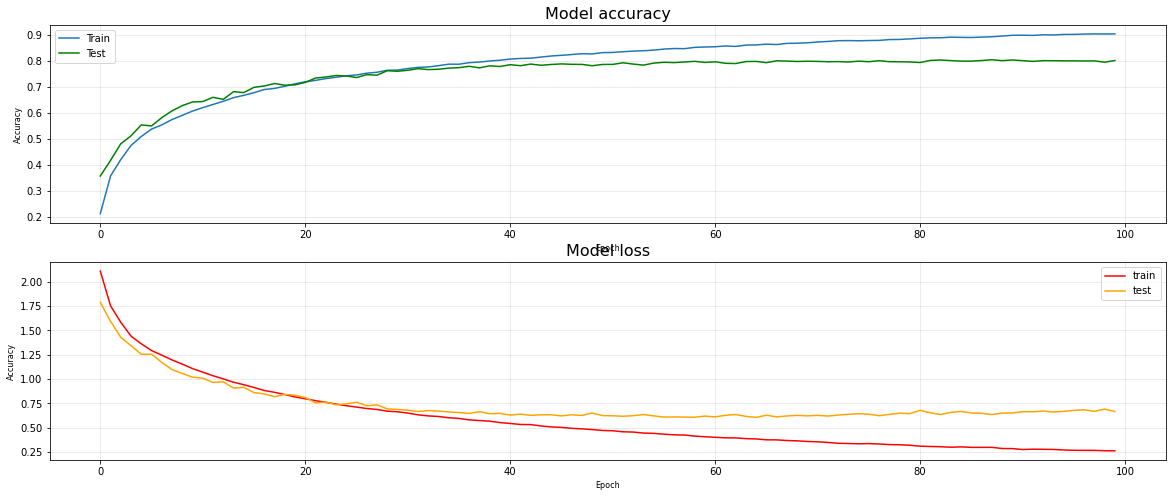

In [14]:
plot_hist(model_history)

In [15]:
test_loss, test_acc = CNN.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)
print('Test loss:    ', test_loss)

10000/10000 [==============================] - 8s 758us/step

Test accuracy: 0.8019999861717224
Test loss:     0.6679006222009659


In [16]:
# Make prediction.

pred = CNN.predict(X_test)

## Display and check predictions

In [17]:
# Convert predictions classes to one hot vectors 

Y_pred_classes = np.argmax(pred, axis=1) 

# Convert validation observations to one hot vectors

Y_true = np.argmax(y_test, axis=1)

# Errors are difference between predicted labels and true labels

errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

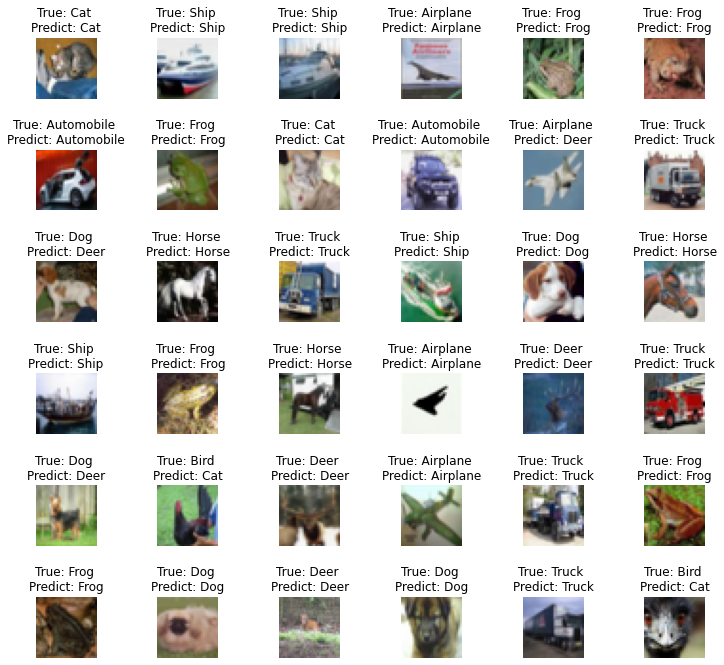

In [18]:
# Row
x = 6
# Column
y = 6

fig, axes = plt.subplots(x, y, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, x*y):
    axes[i].imshow(X_test[i]) # Display the image of the X_test data
    axes[i].set_title("True: %s \nPredict: %s" % (classes[Y_true[i]], classes[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Display Test true vs predicted value and image

In [19]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(X_test[number], axis=0)
    test_result = CNN.predict_classes(test_image)
    plt.imshow(X_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(classes[dict_key],
                                                      classes[Y_true[number]]))

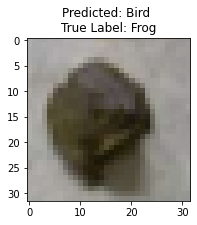

In [35]:
show_test(570)

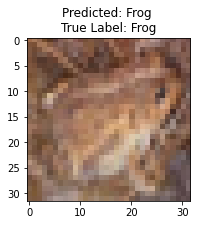

In [33]:
show_test(777)

## Visualize filter weights and Feature maps

In [22]:
# extract only convolutional layers of our trainned network

conv2d_layers = []

for i, layer in enumerate(CNN.layers):
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    conv2d_layers.append(i)
    
    print("{0:<10}: {1}".format(layer.name, filters.shape))

conv2d_1  : (3, 3, 3, 32)
conv2d_2  : (3, 3, 32, 32)
conv2d_3  : (3, 3, 32, 64)
conv2d_4  : (3, 3, 64, 64)


In [23]:
# extrat the weights of the convolutional layers

conv2d_layers_weights = []
for i in conv2d_layers:
    filters, biases = CNN.layers[i].get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    conv2d_layers_weights.append(filters)
    
# this simple CNN has only 2 convolutional layers
# for simplicity we asign them to a variable
conv2d_1 = conv2d_layers_weights[0]
conv2d_2 = conv2d_layers_weights[1]

## Plot filters for first layer

In [24]:
conv2d_1.shape

(3, 3, 3, 32)

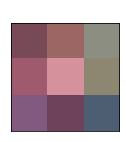

In [25]:
# plot a single filter
filter_id = 15
filter_to_plot =  conv2d_1[:,:,:,filter_id]
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(filter_to_plot)
ax.set_title('Filter {0}'.format(filter_id),c='w')
plt.show()

In [26]:
width, height, depth, n_filters = conv2d_1.shape

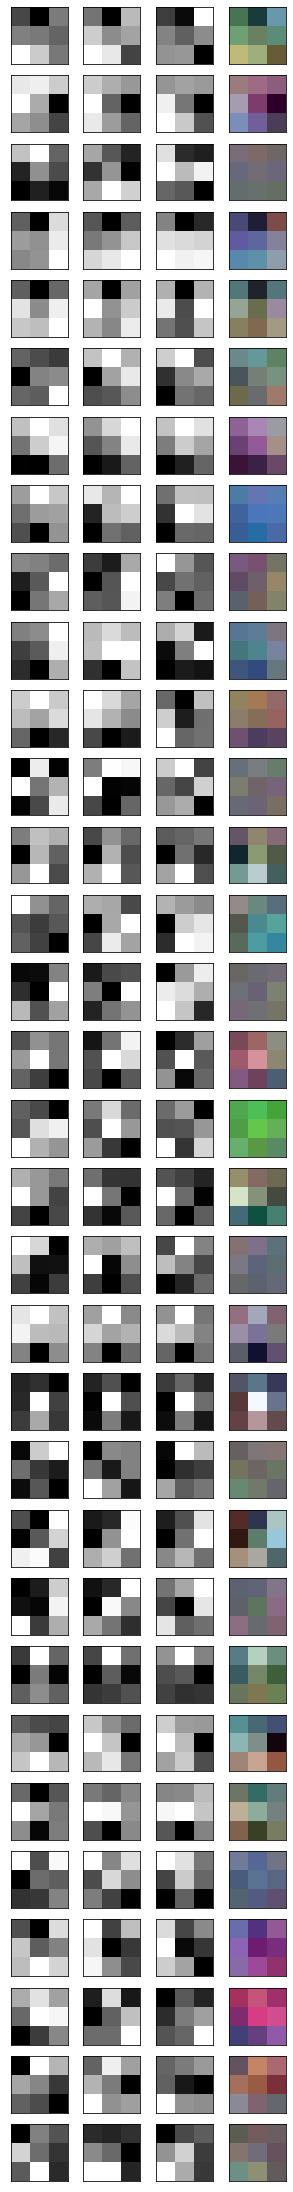

In [27]:
# Plot 32 filters: 3 9x9 channels and combined RGB view 
# Note:
# Combined RGB view only make sense when the depth is 3 (interpreted as RGB) 
# above 3 it doues not make sense to plot all the layers into one image

fig,axs=plt.subplots(n_filters, depth+1,figsize=(5,40))
for i in range(n_filters):
    for j in range(depth):
        filter_chann = conv2d_1[:,:,j,i]
        axs[i,j].imshow(filter_chann,cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        
    axs[i,j+1].imshow(conv2d_1[:,:,:,i])
    axs[i,j+1].set_xticks([])
    axs[i,j+1].set_yticks([])
plt.show()

## Feature Map


In [28]:
layer_index = 0

model = Model(inputs=CNN.inputs, outputs=CNN.layers[layer_index].output)

## Plot Activation maps 

input image shape: (32, 32, 3)


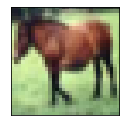

In [29]:
img = X_train[7]
print("input image shape: {0}".format(img.shape))
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img)
plt.show()

In [30]:
# we use the predict method of our model with the filters of interest to produce the feature map
feature_map = model.predict(img.reshape(1,32,32,3))
print(feature_map.shape)

(1, 30, 30, 32)


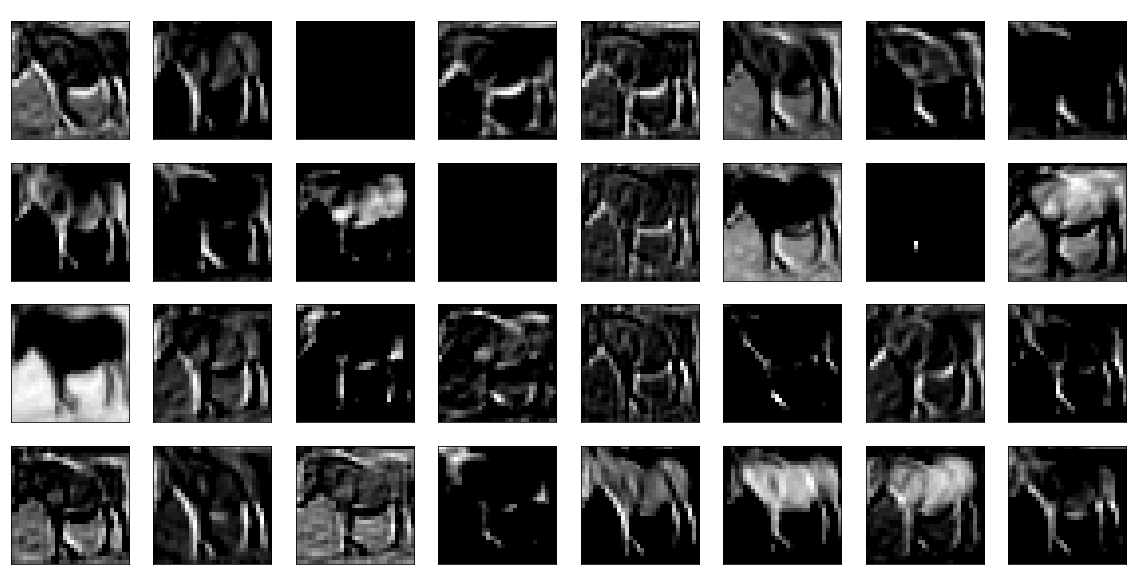

In [31]:
# plot an image per channel
# indexes are shown to locate wich filter produced the feature map
_, h, w, feature_n = feature_map.shape

rows = 4
cols = 8 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='w',fontsize=10)
        axs[i,j].imshow(feature_map[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

## Save the Model

In [40]:
# save the model to disk
filenames = 'finalized_model.sav'
joblib.dump(CNN, filenames)

['finalized_model.sav']

In [44]:
# load the model from disk
loaded_model = joblib.load(filenames)
loss, test_a = loaded_model.evaluate(X_test, y_test)
print(test_a)

10000/10000 [==============================] - 12s 1ms/step
0.8019999861717224


In [32]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model3.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
CNN.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\rmfer\Desktop\UFM\Semestre 7\Machine learning models\virtual_64\Scripts\saved_models\keras_cifar10_trained_model3.h5 
